<h1>AIM: </h1> <p>In this notebook, we try to predict if cancer is of type malignant or benign, given various  independent features </p>

<h1>Libraries Used</h1>
<ol>
    <li> <b> Data Handling : </b> <p> We have Pandas and a NumPy library to handle and manipulate the data. These frameworks will not only help us in loading the data but also allow us to perform various actions to manipulate and mutate the data according to our requirements </p></li>
    <li> <b> Data Visualisation : </b> <p> We all Know that Data Visualisation is equally important while performing analysis. Visualisation gives us a mental picture, allowing us to for correlations easily. For data visaualisations we will use matplotlib and seaborn libraries </p> </li>
    <li> <b> Model Traing and Evaluation : </b>  <p> For statistical modelling we have used, SkLearn and Pytorch librarie.  </p> </li>
</ol>

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pylab as plt
import seaborn as sns 
import pandas as pd
import pickle
import scipy.stats as stats 

from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, fbeta_score, f1_score, roc_curve, classification_report
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import  SVC

import torch
from torch.utils.data import DataLoader, TensorDataset
from torch.nn import functional as F
import torch.nn as nn

# Load Data

<p> Our data is in CSV format. To load the data to our python script, we will use pandas function "read_csv", which takes an argument as the file path! Once the data is loaded, it is loaded as DataFrame type (pandas.DataFrame — pandas 1.4.2 documentation, 2022) <p>

In [2]:
# Load the data set 
data = pd.read_csv("Dataset/train_100r.csv")

# drop the feature 'id' as that does not give any significant information. 
# Thr axis has to be set to 1. this will eliminate the entire id column. 
data.drop( labels= ['id'], axis= 1, inplace= True )

# To have a glance of the data, we use ".head" function, 
# by default it shows first 5 records
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,18.382336,7.256714,91.377706,451.701127,0.078681,0.135853,0.290649,0.120906,0.210508,...,26.770957,13.025038,116.746455,962.654199,0.118997,0.319514,0.783059,0.198664,0.529692,0.160792
1,0,10.302042,16.758441,97.568306,320.033091,0.129037,0.090188,0.043289,0.018798,0.226011,...,13.444048,25.704716,96.355024,219.245739,0.157770,0.122358,0.022506,0.109841,0.279209,0.075751
2,0,8.045502,16.094636,78.540549,600.655293,0.077613,0.064573,0.007241,0.054136,0.186815,...,16.217174,22.345908,112.749125,816.143560,0.110365,0.093854,0.411800,0.076750,0.343249,0.093198
3,0,11.064261,26.550410,67.836043,415.104126,0.116053,0.104673,0.094656,0.024589,0.221436,...,30.842052,24.488840,109.580566,735.080454,0.119673,0.174270,0.062492,0.032425,0.361843,0.090056
4,1,6.892966,27.320674,155.892797,388.564447,0.116123,0.110978,0.122121,0.046933,0.301315,...,31.950207,22.585051,89.875289,1392.646916,0.114831,0.166710,0.198205,0.180283,0.342547,0.105414



<p style="text-align: justify "> 
    Dataset provided has various features that describe breast cancer as malignant or benign. Provided are 25524 records and 30 elements that define the output dependent variable.
</p>

We may have a better grasp of each column and the sort of data it contains by reading the sections below:
<ol>   
<li>ID Number:</li> The serial number of each record in the dataset is stored in this integer type field.
<li>Diagnosis:</li> This column contains our tagged data on whether a doctor diagnosed the patient was diagnosed with breast cancer, with "M" representing a malignant cancer cell and "B" representing tumour cells.
<li>Radius:</li> This column of type integer contains information on each patient's cancer cell at the time of therapy. The radius is the average of the distances between the centre and the points on the periphery.
<li>Texture:</li> This integer type column contains information on the texture of each patient's cancer cells at the time of therapy. The standard deviation of grey-scale values is known as texture.
<li>Perimeter:</li> At the time of therapy, this column of type integer holds information on the perimeter of each patient's cancer cell.
<li>Area:</li> This column of type integer contains information on the area of each cancer cell at the time of therapy.
<li>Smoothness:</li> This integer type column offers local variation in radius lengths.
<li>Compactness:</li> This integer type column offers data on the compactness of each cancer cell. The compactness is calculated by using the formula perimeter^2 / area - 1.0.
<li>Concavity:</li> This integer type column contains information about the severity of concave sections of each cancer cell's shape.
<li>Concave points:</li> This integer type column contains information about the number of concave portions of the contour of each cancer cell's shape.
<li>Symmetry:</li> This integer type column contains information about the symmetry of each cancer cell's shape.
<li>Fractal dimension:</li> This integer type column contains information about the coastline approximation of each cancer cell's shape.
<ol>
    


<p style="text-align: justify "> 
For each picture, the mean, standard error, and "worst" or worst (mean of the three most significant values) features were computed, yielding 30 features.
</p>

In [3]:
diagnosis = data['diagnosis']
data.drop( labels= [ 'diagnosis' ], axis= 1, inplace= True )
data['diagnosis'] = diagnosis
data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,18.382336,7.256714,91.377706,451.701127,0.078681,0.135853,0.290649,0.120906,0.210508,0.055248,...,13.025038,116.746455,962.654199,0.118997,0.319514,0.783059,0.198664,0.529692,0.160792,1
1,10.302042,16.758441,97.568306,320.033091,0.129037,0.090188,0.043289,0.018798,0.226011,0.055626,...,25.704716,96.355024,219.245739,0.157770,0.122358,0.022506,0.109841,0.279209,0.075751,0
2,8.045502,16.094636,78.540549,600.655293,0.077613,0.064573,0.007241,0.054136,0.186815,0.051772,...,22.345908,112.749125,816.143560,0.110365,0.093854,0.411800,0.076750,0.343249,0.093198,0
3,11.064261,26.550410,67.836043,415.104126,0.116053,0.104673,0.094656,0.024589,0.221436,0.068286,...,24.488840,109.580566,735.080454,0.119673,0.174270,0.062492,0.032425,0.361843,0.090056,0
4,6.892966,27.320674,155.892797,388.564447,0.116123,0.110978,0.122121,0.046933,0.301315,0.059410,...,22.585051,89.875289,1392.646916,0.114831,0.166710,0.198205,0.180283,0.342547,0.105414,1


# Exploratory Data Analysis

### Data Shape

In [4]:
# Size of data set
data.shape

(25524, 31)

<p> From the shape of the data set, we can see that we have 25524 records and the number of dependent and independent features are 31. The target varibale here is "Grade" </p>
<hr>

### Data information

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25524 entries, 0 to 25523
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              25524 non-null  float64
 1   texture_mean             25524 non-null  float64
 2   perimeter_mean           25524 non-null  float64
 3   area_mean                25524 non-null  float64
 4   smoothness_mean          25524 non-null  float64
 5   compactness_mean         25524 non-null  float64
 6   concavity_mean           25524 non-null  float64
 7   concave points_mean      25524 non-null  float64
 8   symmetry_mean            25524 non-null  float64
 9   fractal_dimension_mean   25524 non-null  float64
 10  radius_se                25524 non-null  float64
 11  texture_se               25524 non-null  float64
 12  perimeter_se             25524 non-null  float64
 13  area_se                  25524 non-null  float64
 14  smoothness_se         

### Handling Null Values

In [6]:
# see the number of null values 

# iterate through every column name in data farme
for feature_name in data.columns:
    
    # using "isna()" function find the NaNa values, returns  boolian 
    # if True, count it as a NaNa 
    print(f"{feature_name} -> {data[feature_name].isna().sum()}")

radius_mean -> 0
texture_mean -> 0
perimeter_mean -> 0
area_mean -> 0
smoothness_mean -> 0
compactness_mean -> 0
concavity_mean -> 0
concave points_mean -> 0
symmetry_mean -> 0
fractal_dimension_mean -> 0
radius_se -> 0
texture_se -> 0
perimeter_se -> 0
area_se -> 0
smoothness_se -> 0
compactness_se -> 0
concavity_se -> 0
concave points_se -> 0
symmetry_se -> 0
fractal_dimension_se -> 0
radius_worst -> 0
texture_worst -> 0
perimeter_worst -> 0
area_worst -> 0
smoothness_worst -> 0
compactness_worst -> 0
concavity_worst -> 0
concave points_worst -> 0
symmetry_worst -> 0
fractal_dimension_worst -> 0
diagnosis -> 0


<p>
    We do not have any missing values, as we see from the above output. 
</p>
<hr>

### Data Normalisation

In [7]:
# describe the data 

data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
count,25524.000000,25524.000000,25524.000000,25524.000000,25524.000000,25524.000000,25524.000000,25524.000000,25524.000000,25524.000000,...,25524.000000,25524.000000,25524.000000,25524.000000,25524.000000,25524.000000,25524.000000,25524.000000,25524.000000,25524.000000
mean,12.587571,18.797795,97.909665,670.853706,0.106022,0.145079,0.150999,0.084847,0.210100,0.060882,...,23.071630,134.652917,925.856172,0.114559,0.175136,0.348091,0.166719,0.343439,0.098569,0.499843
std,3.503795,5.360127,27.442430,389.374163,0.017768,0.074372,0.129404,0.058930,0.039238,0.007007,...,6.030421,45.550691,566.589369,0.024297,0.144550,0.237368,0.089293,0.082335,0.024277,0.500010
min,3.191287,5.996412,36.261743,13.066939,0.041578,0.006820,0.000004,0.000009,0.113199,0.039425,...,8.120317,52.469394,2.476110,0.038316,0.000019,0.000024,0.000061,0.112617,0.052574,0.000000
25%,9.869745,14.779183,78.418036,402.636524,0.093072,0.088716,0.036953,0.032673,0.183327,0.056041,...,18.678515,99.388127,514.927885,0.096844,0.073974,0.162795,0.090028,0.290525,0.082560,0.000000
50%,12.091910,18.227065,91.881158,555.694186,0.105574,0.132074,0.118348,0.079349,0.205545,0.060007,...,22.510936,115.464171,759.650384,0.113319,0.137480,0.304954,0.156044,0.331700,0.091055,0.000000
75%,14.924692,22.241400,111.462838,838.174559,0.119046,0.181743,0.240190,0.121400,0.230752,0.064458,...,26.852011,172.313135,1259.557683,0.129747,0.234840,0.484126,0.246340,0.375807,0.109395,1.000000
max,31.654623,37.532992,196.268248,3686.006697,0.182599,0.384272,0.572661,0.261141,0.350274,0.101394,...,47.762364,290.031452,4386.880701,0.262451,1.085080,1.308318,0.362273,0.661336,0.181523,1.000000


<p>
    As we see here from the above output, the standard deviation of various features is different by a large margine. We have to normalise the data for our model to work efficiently. We will implement a log transformation to normalise the data points for every feature. 
</p>

In [8]:
data_fea = data.columns[: -1]
data[data_fea] = data[data_fea].apply(np.log)

data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
count,25524.000000,25524.000000,25524.000000,25524.000000,25524.000000,25524.000000,25524.000000,25524.000000,25524.000000,25524.000000,...,25524.000000,25524.000000,25524.000000,25524.000000,25524.000000,25524.000000,25524.000000,25524.000000,25524.000000,25524.000000
mean,2.494621,2.892442,4.547160,6.357263,-2.258477,-2.068785,-2.433115,-2.786132,-1.577037,-2.805076,...,3.104225,4.849259,6.643173,-2.189144,-2.118741,-1.381962,-1.996760,-1.095374,-2.343858,0.499843
std,0.276654,0.290750,0.268951,0.552381,0.170981,0.547509,1.240575,0.906130,0.182858,0.110605,...,0.264552,0.322369,0.639206,0.213107,1.001092,0.975723,0.742111,0.228172,0.225624,0.500010
min,1.160424,1.791161,3.590763,2.570085,-3.180178,-4.987865,-12.537358,-11.614958,-2.178606,-3.233344,...,2.094369,3.960230,0.906689,-3.261896,-10.881654,-10.616837,-9.712867,-2.183763,-2.945528,0.000000
25%,2.289474,2.693220,4.362054,5.998034,-2.374383,-2.422311,-3.298103,-3.421192,-1.696484,-2.881666,...,2.927374,4.599033,6.244027,-2.334657,-2.604040,-1.815262,-2.407638,-1.236066,-2.494235,0.000000
50%,2.492537,2.902908,4.520496,6.320218,-2.248340,-2.024389,-2.134125,-2.533902,-1.582090,-2.813297,...,3.114001,4.748960,6.632858,-2.177549,-1.984280,-1.187594,-1.857619,-1.103523,-2.396296,0.000000
75%,2.703017,3.101955,4.713691,6.731226,-2.128247,-1.705161,-1.426324,-2.108666,-1.466414,-2.741736,...,3.290341,5.149313,7.138516,-2.042171,-1.448850,-0.725410,-1.401044,-0.978678,-2.212791,1.000000
max,3.454884,3.625220,5.279482,8.212299,-1.700460,-0.956406,-0.557461,-1.342694,-1.049039,-2.288745,...,3.866238,5.669989,8.386374,-1.337690,0.081653,0.268742,-1.015358,-0.413493,-1.706375,1.000000


<hr>

### Visualisation of Data Distribution

<p>
    For our model to work at optimum, we must have a data distribution that is normally distributed. Because it accurately captures the distribution of values for many natural occurrences, it is the most important probability distribution in statistics. Characteristics resulting from a number of independent processes tend to follow a normal distribution.
</p>

radius_mean


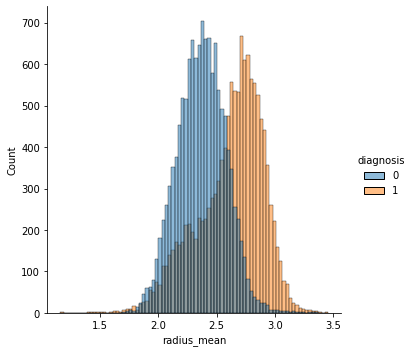

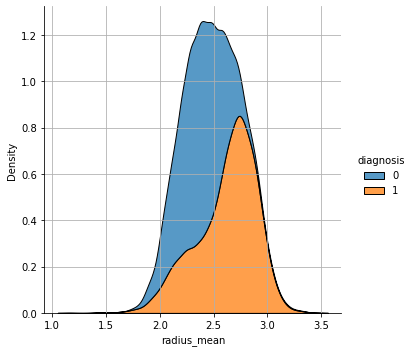

texture_mean


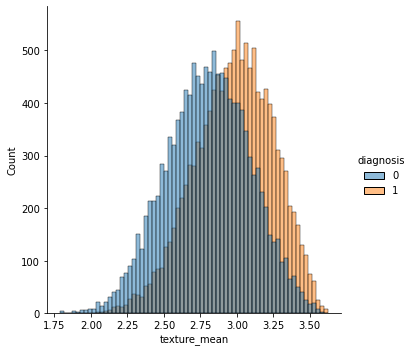

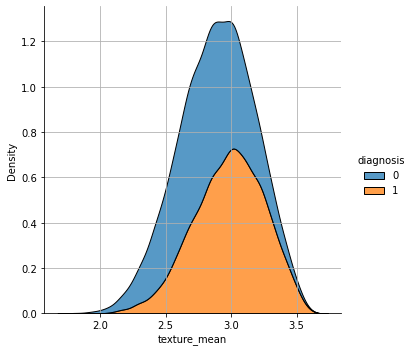

perimeter_mean


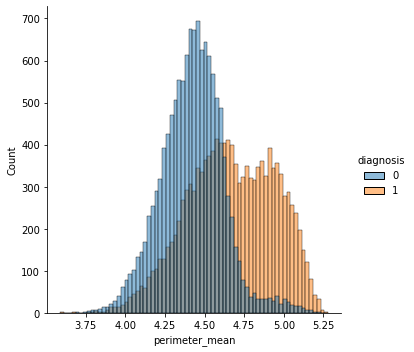

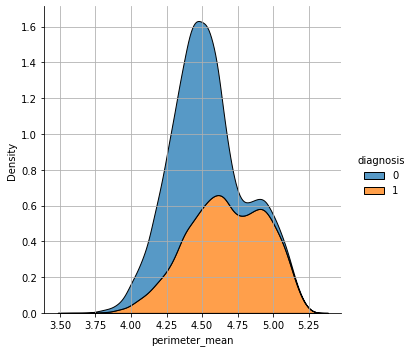

area_mean


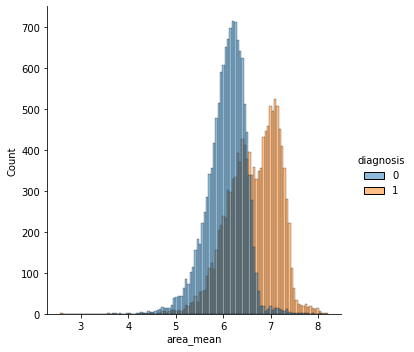

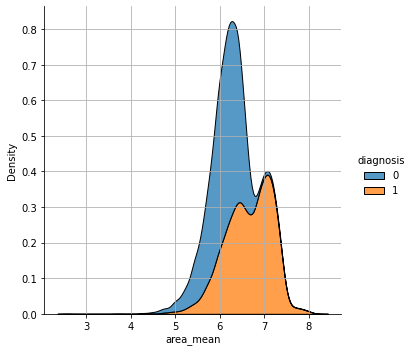

smoothness_mean


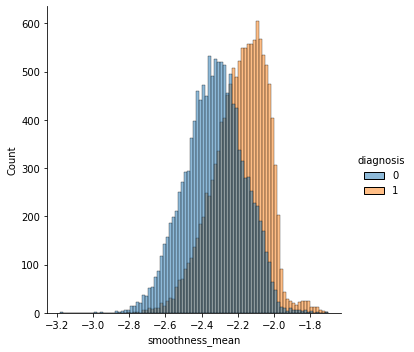

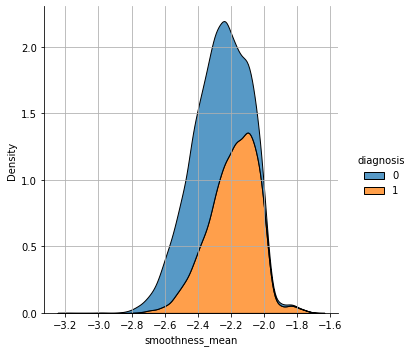

compactness_mean


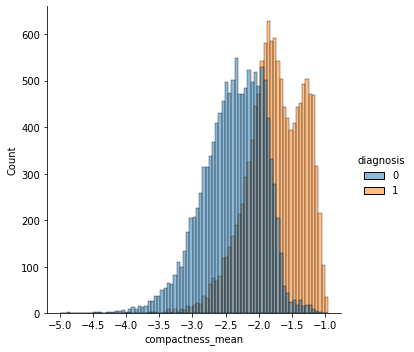

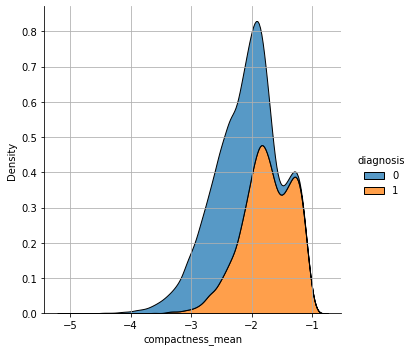

concavity_mean


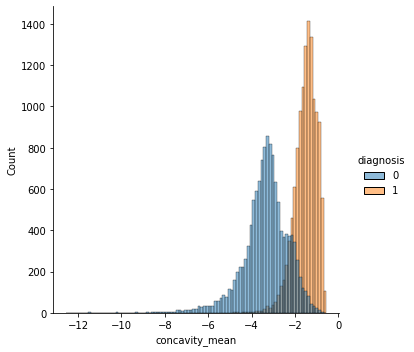

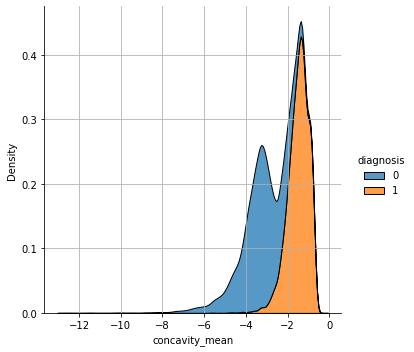

concave points_mean


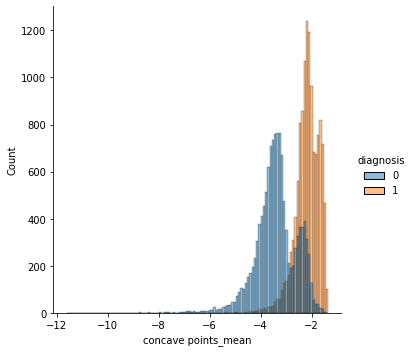

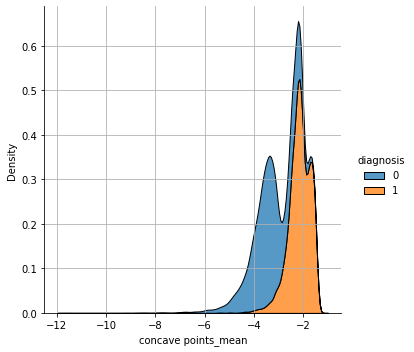

symmetry_mean


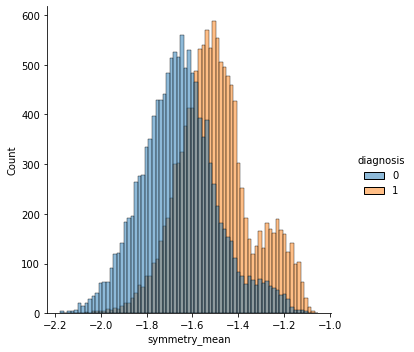

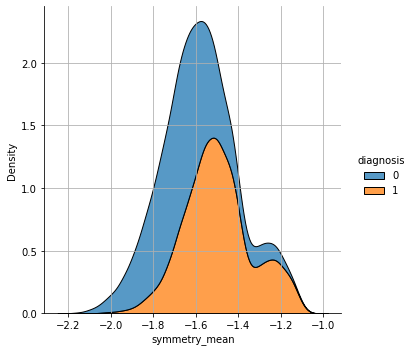

fractal_dimension_mean


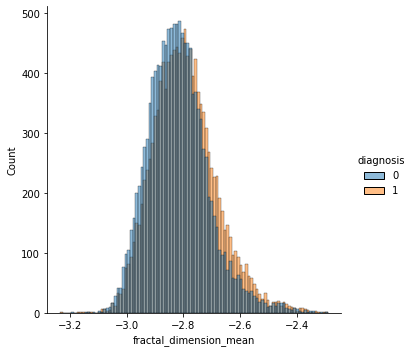

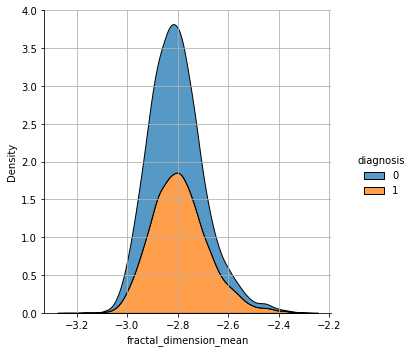

radius_se


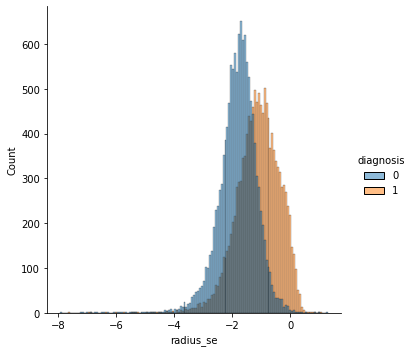

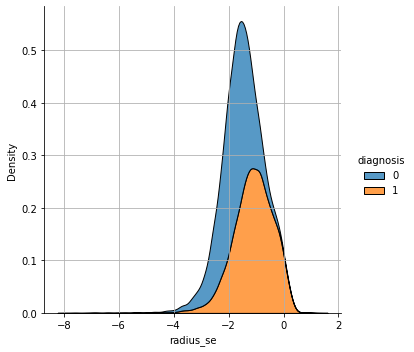

texture_se


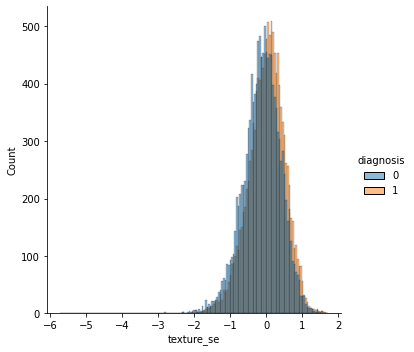

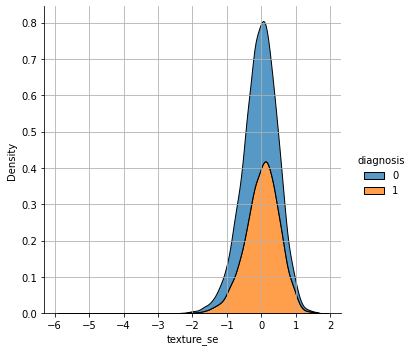

perimeter_se


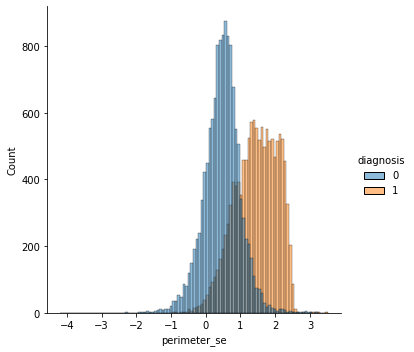

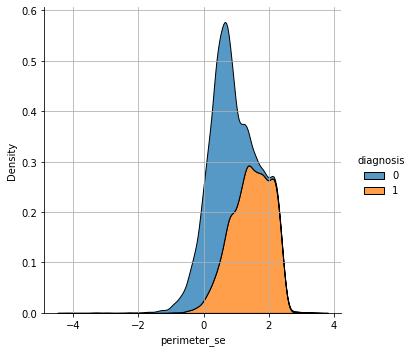

area_se


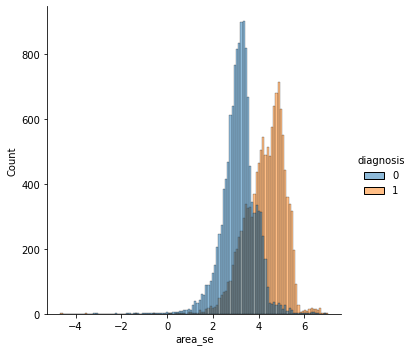

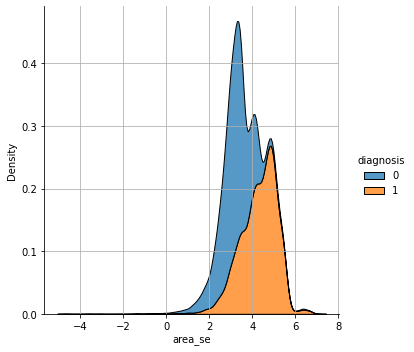

smoothness_se


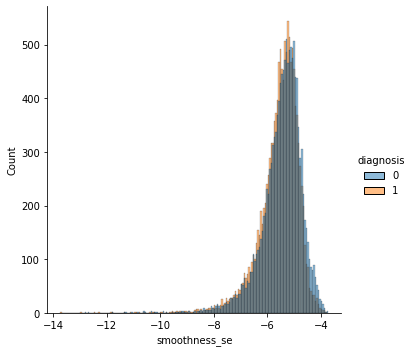

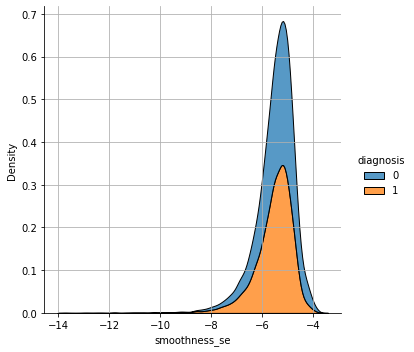

compactness_se


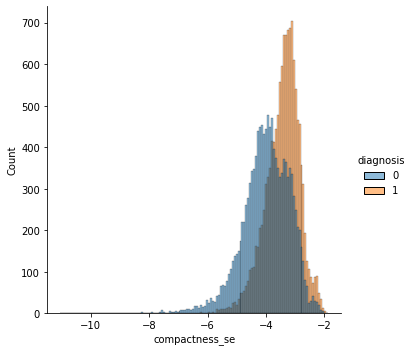

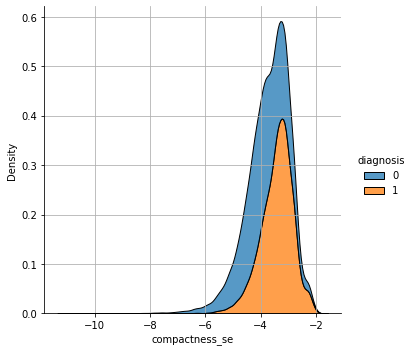

concavity_se


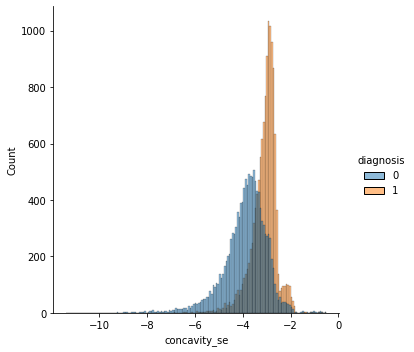

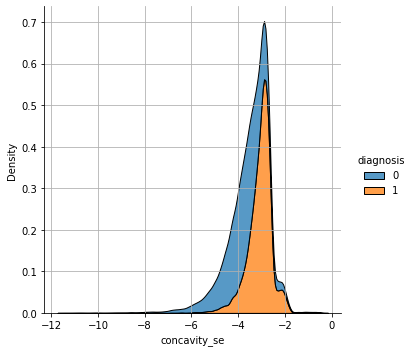

concave points_se


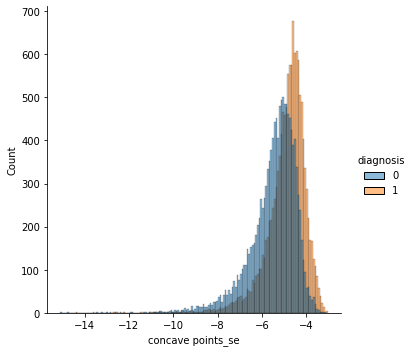

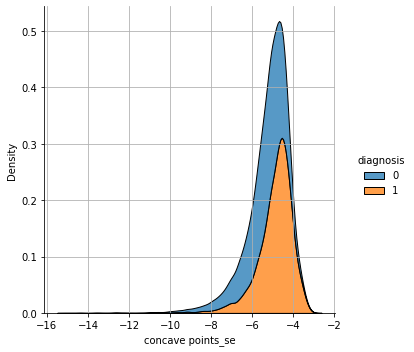

symmetry_se


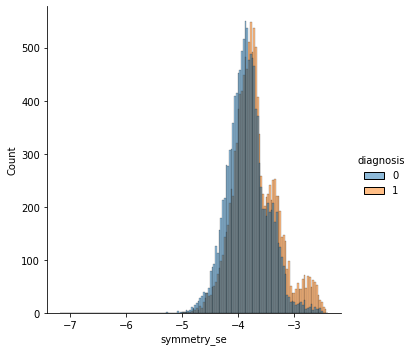

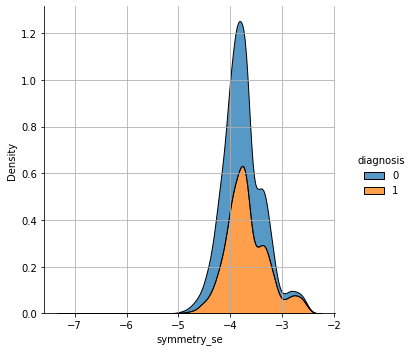

fractal_dimension_se


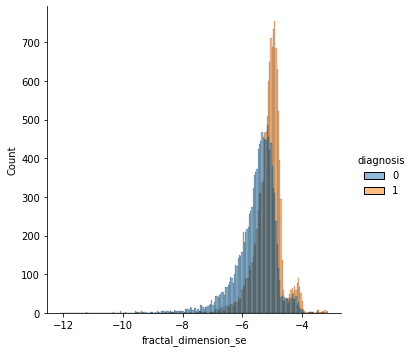

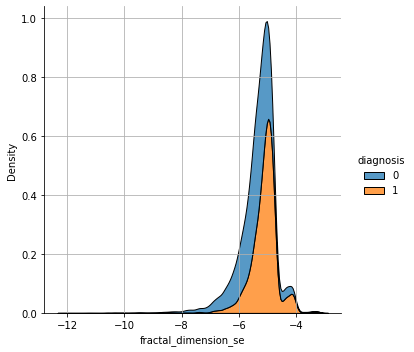

radius_worst


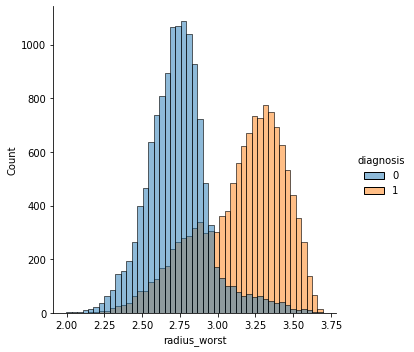

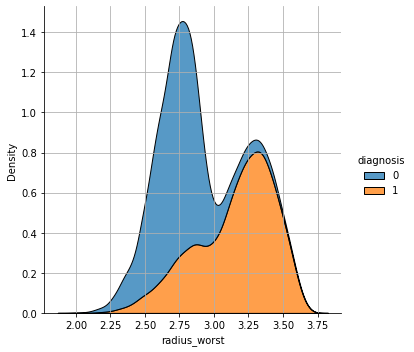

texture_worst


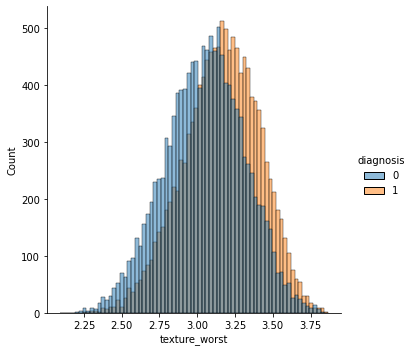

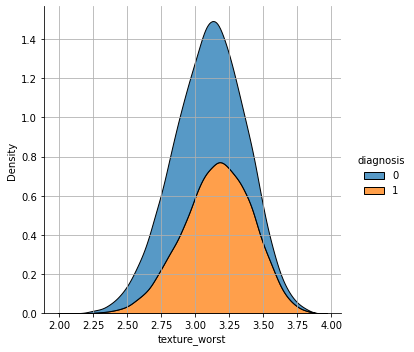

perimeter_worst


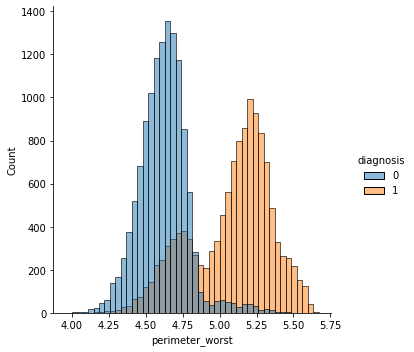

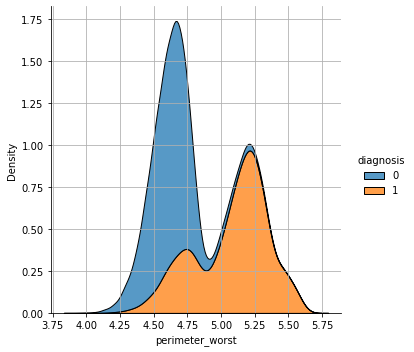

area_worst


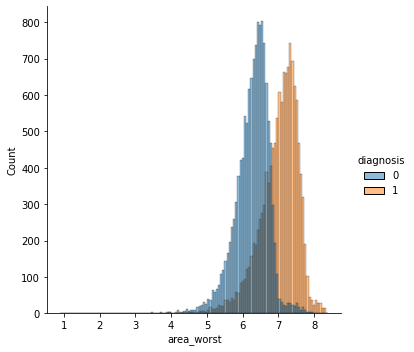

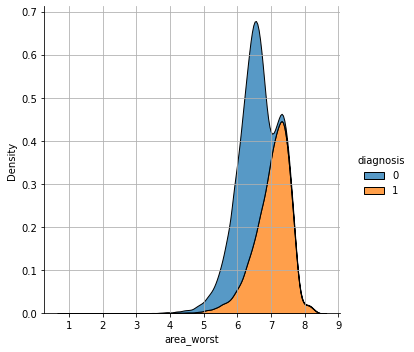

smoothness_worst


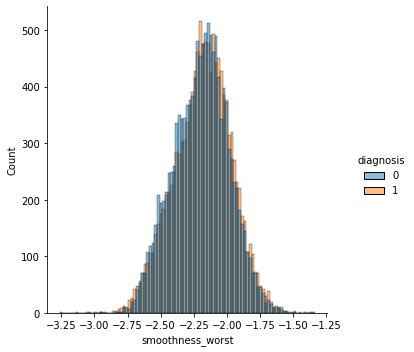

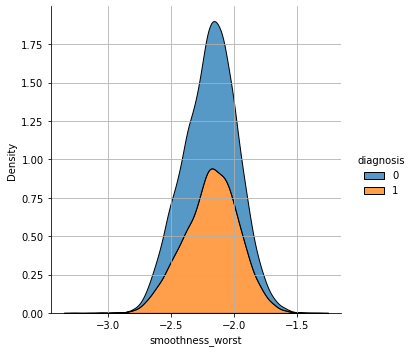

compactness_worst


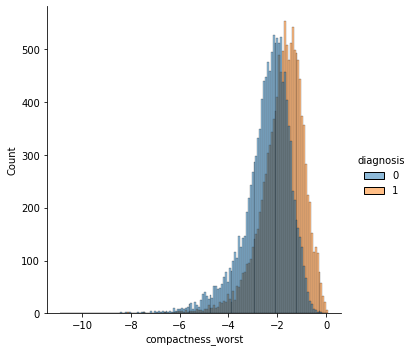

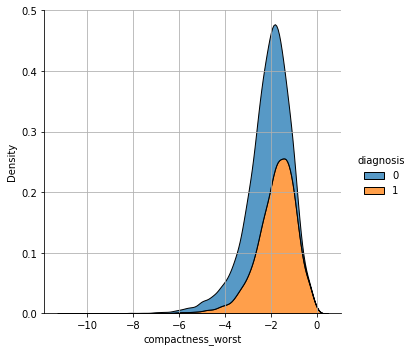

concavity_worst


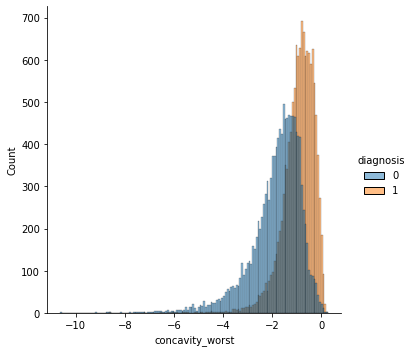

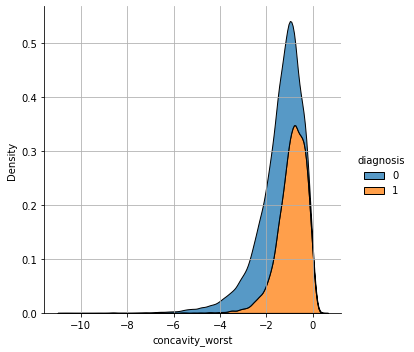

concave points_worst


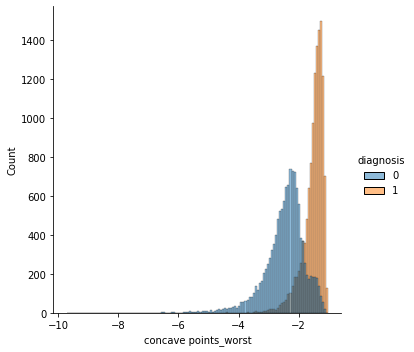

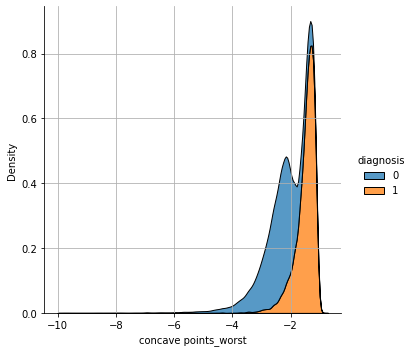

symmetry_worst


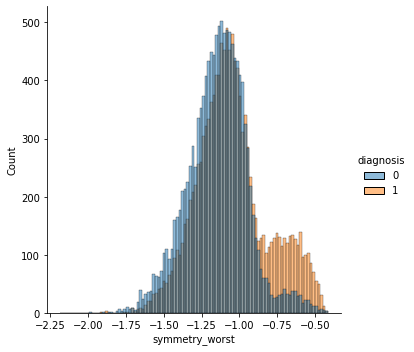

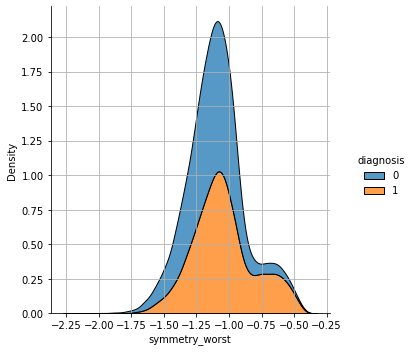

fractal_dimension_worst


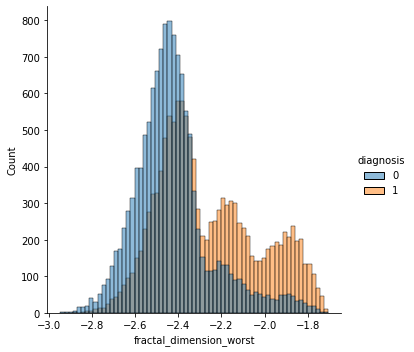

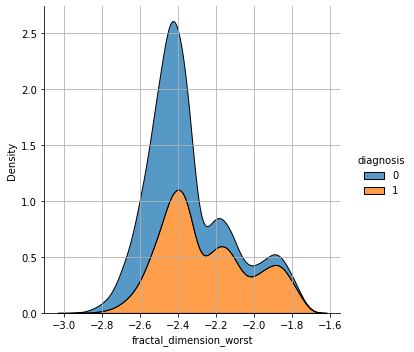

In [9]:
# Data Distribution 

# iterate through all the numerical columns to visualise there distribution

for colm in data.select_dtypes(np.number).columns[:-1]:
    
    print(colm) 
    sns.displot(data, x = colm,  hue="diagnosis")
    sns.displot(data, x = colm,  hue="diagnosis", kind="kde", fill=True,  multiple="stack")
    plt.grid()
    plt.show()

<p>
    As you see here, some data features are tail heavy. On applying various transformation techniques to normalise the data we were still not able to bring them to gaussian distributed curve, thus will drop these features. The data features are  concavity_mean, concave points_mean, perimeter_se, area_se, smoothness_se, concavity_se, concave points_se, fractal_dimension_se, area_worst, compactness_worst, concavity_worst, concave points_worst
</p>


In [10]:
feature_to_drop = ["concavity_mean", "concave points_mean", "perimeter_se", "area_se", "smoothness_se", "concavity_se", "concave points_se", "fractal_dimension_se",
                   "area_worst", "compactness_worst", "concavity_worst", "concave points_worst"]
data.drop(labels= feature_to_drop , axis= 1, inplace= True)

<hr>

### Visualisation of Output Classes

<p>
    While working with statistical modelling, we must have balanced data. Balanced data is when there is an equal number of classes in the output feature. If the number of the class is imbalanced, the prediction might result to a biased output. We usually under-sample or oversample the data to generate synthetic data points to handle this.
</p>

0    12766
1    12758
Name: diagnosis, dtype: int64



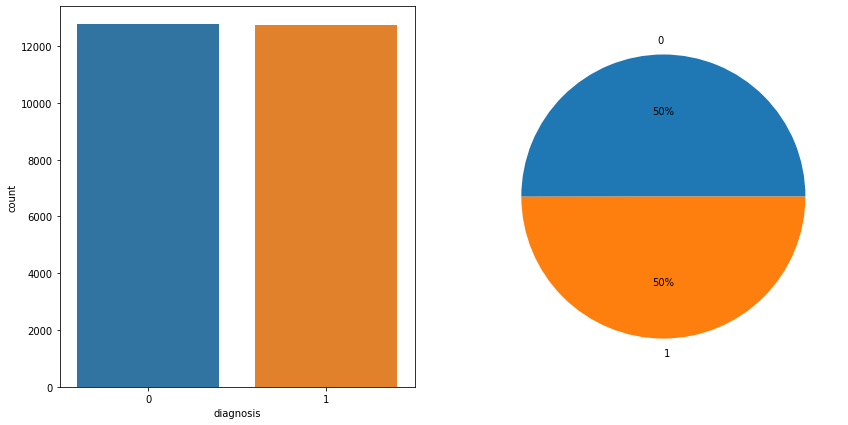

In [11]:
# Class distribution of Output/dependent feature

print( data['diagnosis'].value_counts() )
print()

plt.figure(figsize= (14, 7))

plt.subplot(1, 2, 1)
sns.countplot(x = 'diagnosis' , data = data)

plt.subplot(1, 2, 2)
plt.pie(data['diagnosis'].value_counts() , labels= [0, 1], autopct='%.0f%%')

plt.show()

<hr>

### Handle Outliers

<p style="text-align: justify "> 
    <ol>
        <li>What is an Anomaly/Outlier? </li> 
        <p>An outlier is a data point that differs significantly from other observations in statistics. An outlier can be the result of measurement variability or it can be the result of experimental error. In statistical analysis, an outlier might generate major consequences. </p>
        <li>Why Care about Anomaly? </li>
        <p>Detecting and correcting outliers is one of the most critical tasks in data preparation since they can have a detrimental impact on statistical analysis and the training process of a predictive model, resulting in reduced accuracy. </p>
        <li>Five Ways to detect Anomaly </li> 
        <p>Here are some of the ways to delt with outliers </p>
            <ol>
                <li> Standard Deviation </li>
                <li> Boxplots </li>
                <li> DBScan Clustering </li>
                <li> Isolation Forest </li>
                <li> Robust Random Cut Forest </li>
            </ol>
    </ol>
</p>
(Badr, 2022)

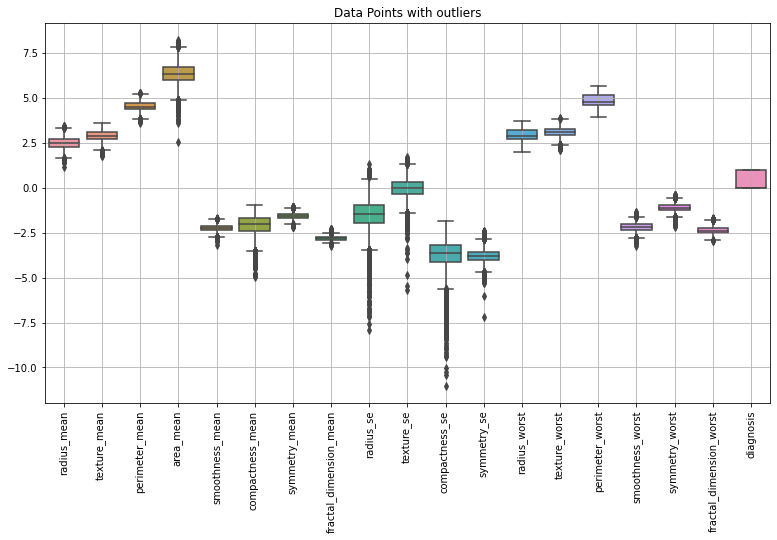

In [12]:
# Outlier Detection 
#Using Boxplot to display outliers present in the dataset

plt.figure(figsize=(13,7))
plt.title("Data Points with outliers")
sns.boxplot(data = data)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

<p>
    Here we are going to use Inter quartilie method to determine the Lower and Upper bound. The IQR is obtained by finding the difference between the upper quartile and the lower  quartile. Any data that is outide the IQR range is considered as an outlier and that record is eliminated (Outlier detection 101: Median and Interquartile range., 2022)
</p>

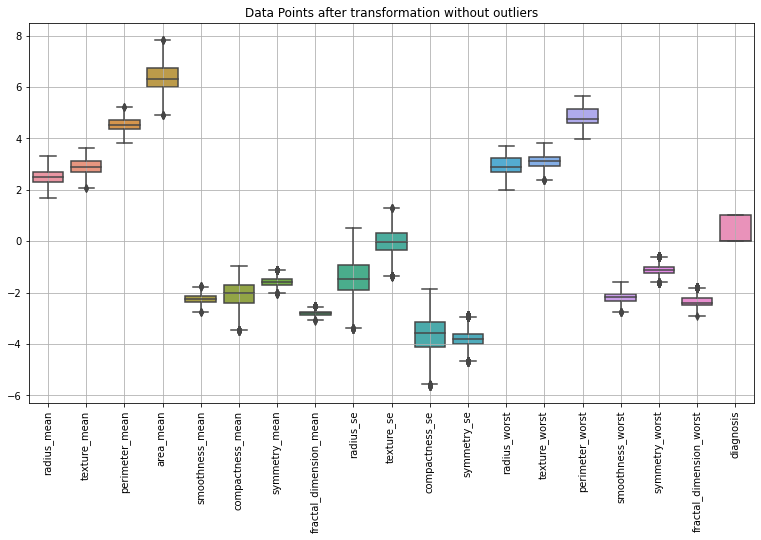

In [13]:
# Find the upper bound and lower bound for every feature 

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3-Q1
lower_bound = (Q1-1.5*IQR)
upper_bound = (Q3+1.5*IQR)


data = data[~((data < lower_bound) | (data > upper_bound ) ).any(axis = 1)];

#Using Boxplot to display outliers present in the dataset
plt.figure(figsize=(13,7))
plt.title("Data Points after transformation without outliers")
sns.boxplot(data = data)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

<hr>

<p>
Identification of relevant features is an essential step for making a robust model. This can be done in one of two ways <b>Feature Selection</b> and <b>Feature Extraction</b> 
</p>

### Feature Selection

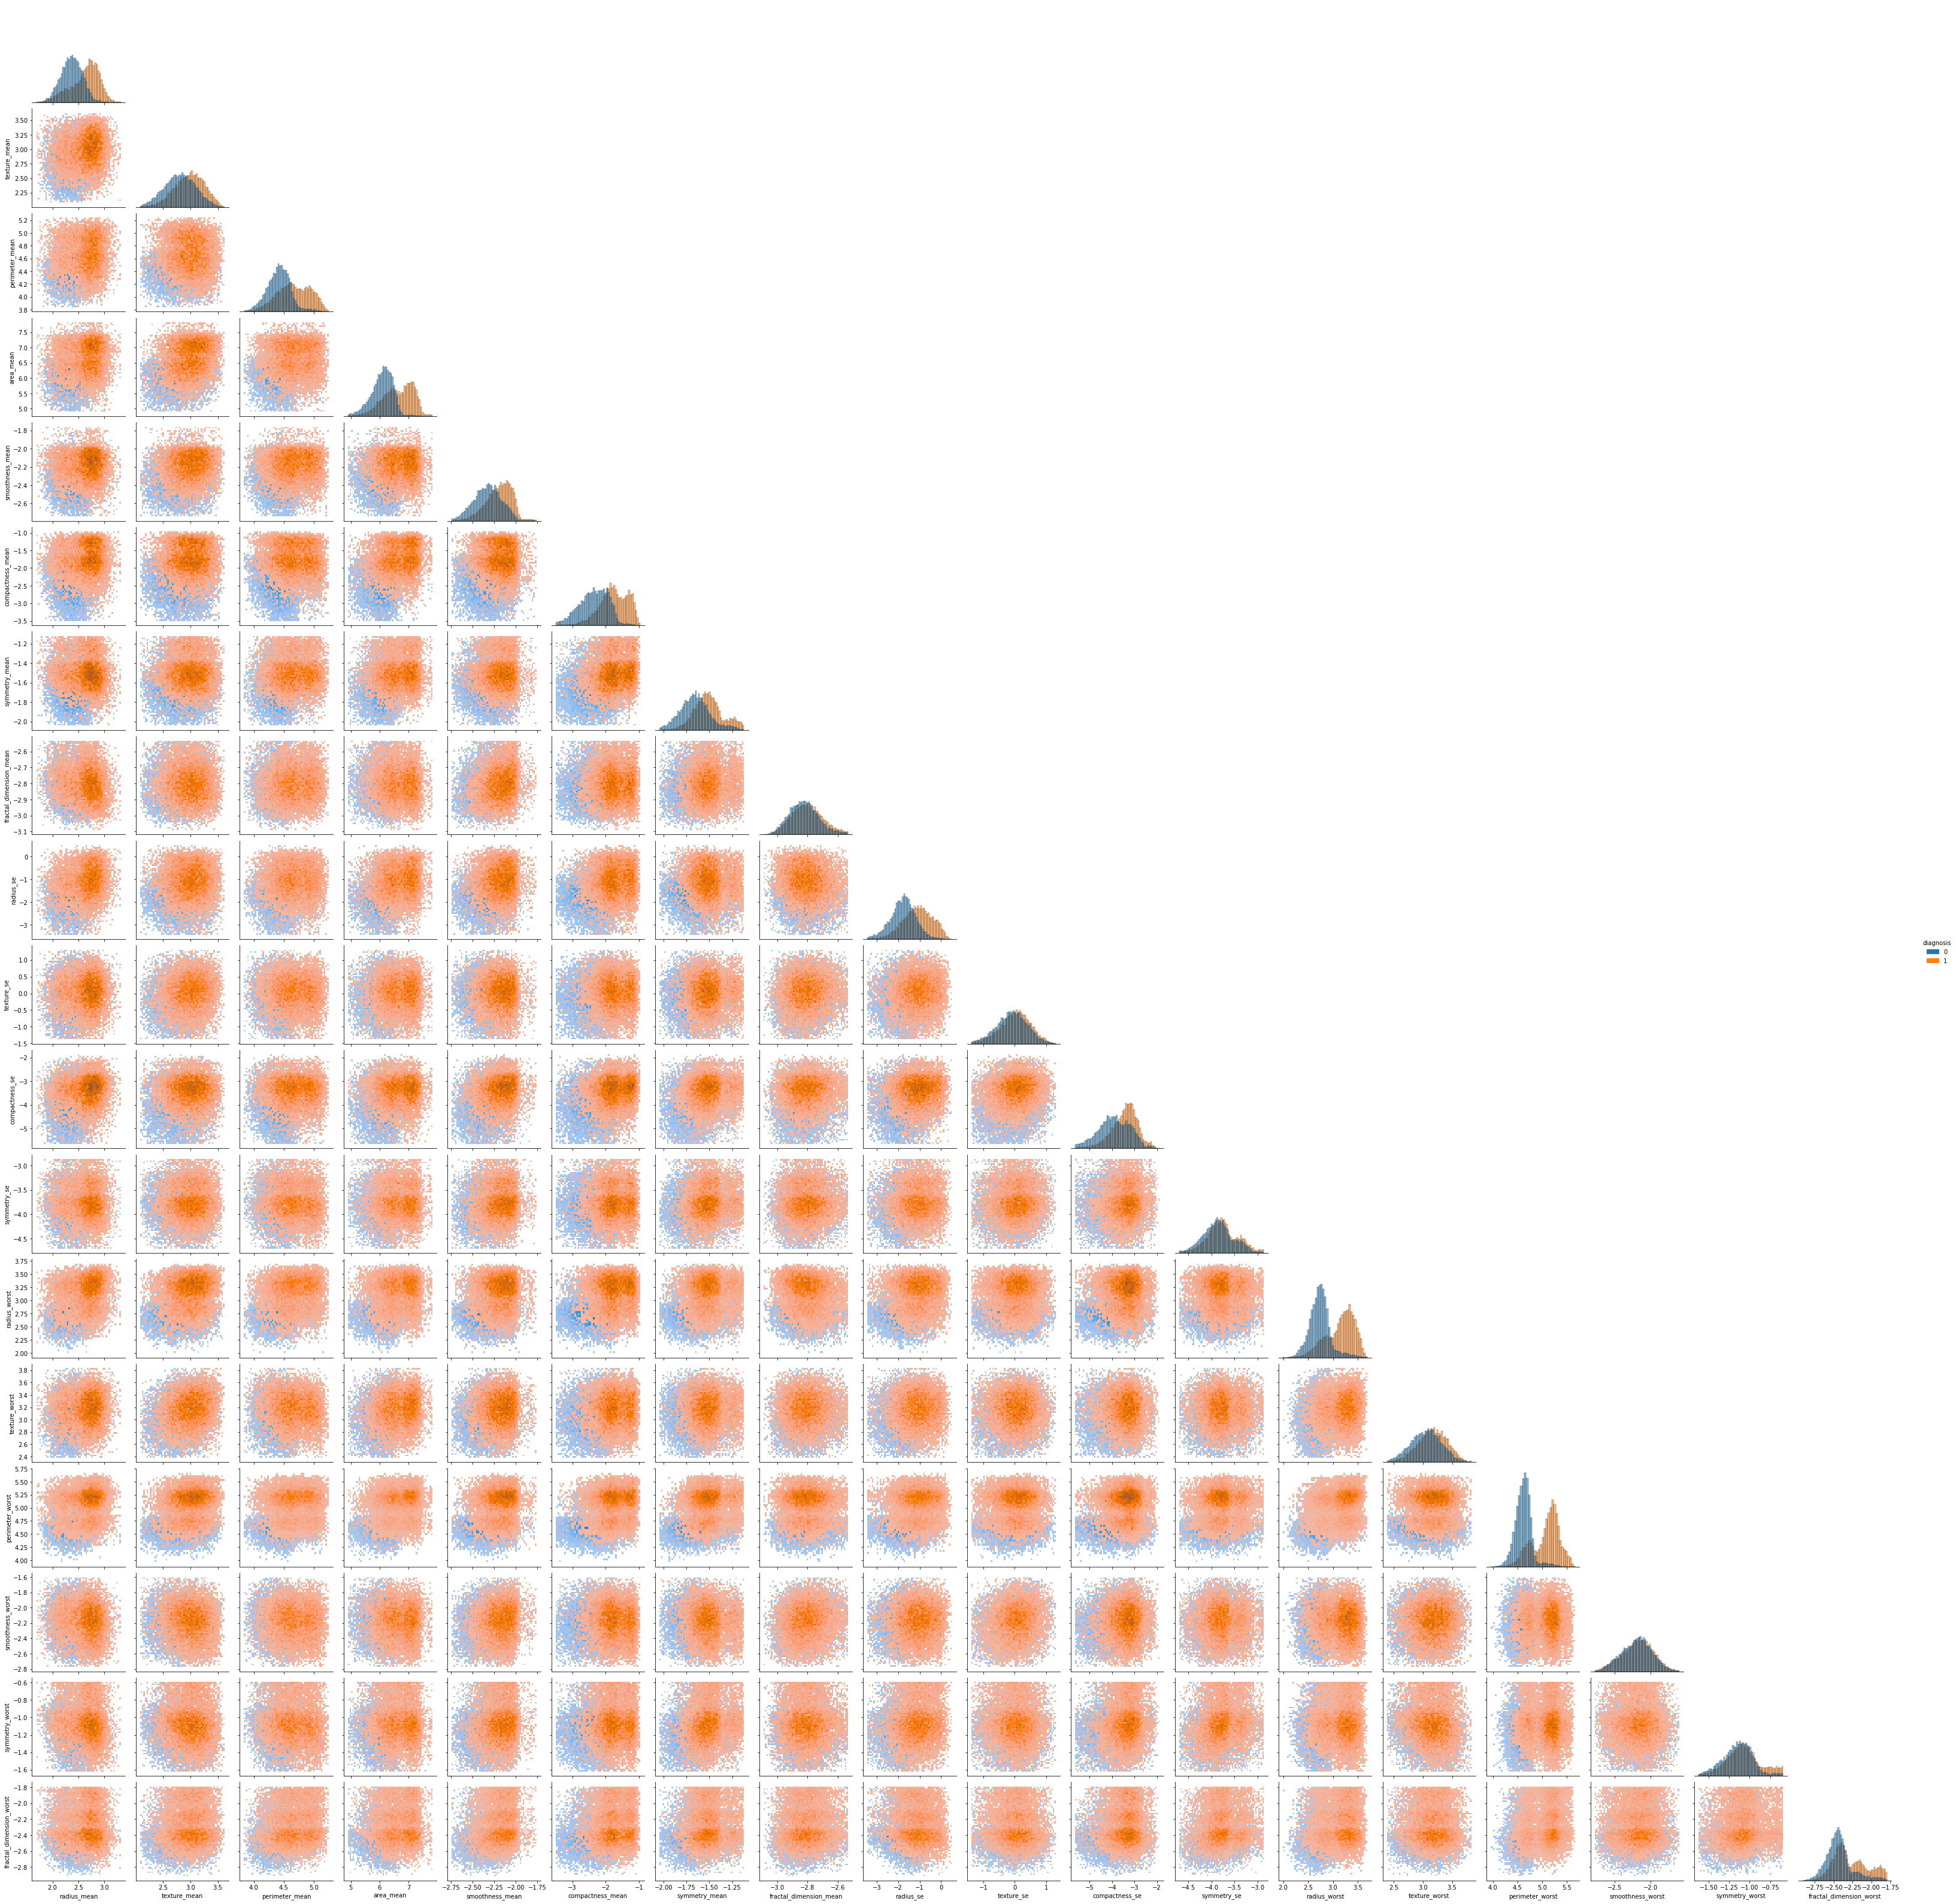

In [14]:
sns.pairplot(data, kind="hist",  hue="diagnosis", corner= True)
plt.show()

<p>
    From the histogram pair plot above we can see , that most of the data point are overlapping. What this means is data is not linearly separable.
</p>

<p>
    Feature selection is the technique where we select the relevant feature <b> without transforming our data points </b>
</p>

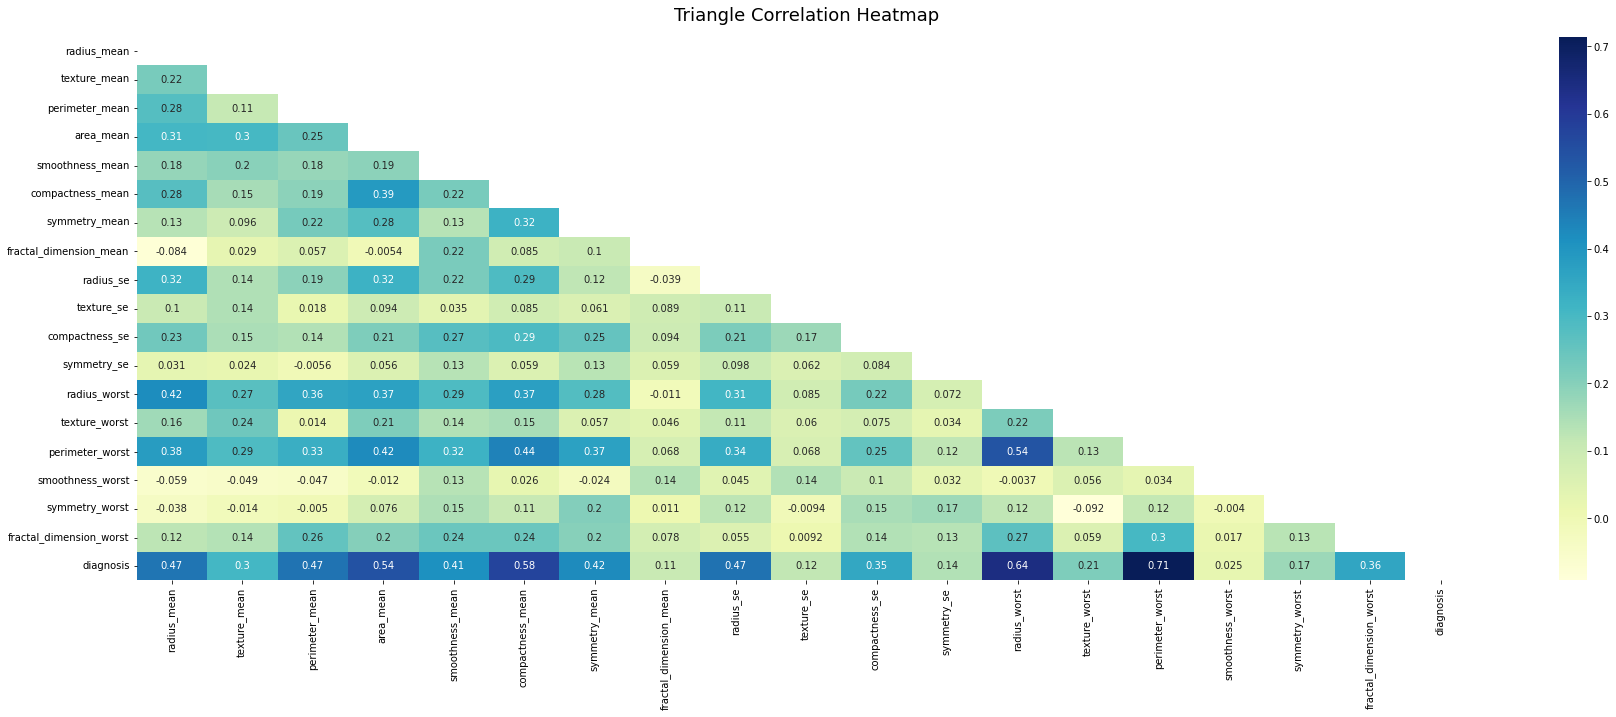

In [15]:
# Corelation Matrix

plt.figure(figsize = (30,10))

mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))
heatmap = sns.heatmap(data.corr(), mask=mask, annot=True, cmap="YlGnBu")

heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

<p>
    When a feature has a broader variance, the data is more generic. This means that we have more parameters to learn and identify a pattern. Any data point that has less variance is dropped
</p>


In [16]:
def variance(data):
    # Number of observations
    n = len(data)
    # Mean of the data

    mean = sum(data) / n

    # Square deviations

    deviations = [(x - mean) ** 2 for x in data]

    # Variance

    variance = sum(deviations) / n

    return variance

In [17]:
for i in data.columns[:-1]:
    print(f" {i} -> {variance(data[i].values)} ")

 radius_mean -> 0.07523792681692819 
 texture_mean -> 0.0822657930151501 
 perimeter_mean -> 0.07151092037367217 
 area_mean -> 0.2807274689811356 
 smoothness_mean -> 0.027888008465151416 
 compactness_mean -> 0.2701424738324366 
 symmetry_mean -> 0.03133135441164619 
 fractal_dimension_mean -> 0.01000977201624177 
 radius_se -> 0.5216582120747564 
 texture_se -> 0.2339010241780905 
 compactness_se -> 0.46817551913883165 
 symmetry_se -> 0.1125414237098847 
 radius_worst -> 0.10509086598931477 
 texture_worst -> 0.06737379780378829 
 perimeter_worst -> 0.10369495496988808 
 smoothness_worst -> 0.043853788610716656 
 symmetry_worst -> 0.040112033684308025 
 fractal_dimension_worst -> 0.04677006193042647 


In [18]:
for i in data.columns[:-1]:
    if variance(data[i].values) <= 0.1:
        data.drop(labels=[i], axis = 1, inplace= True)
        feature_to_drop.append(i)

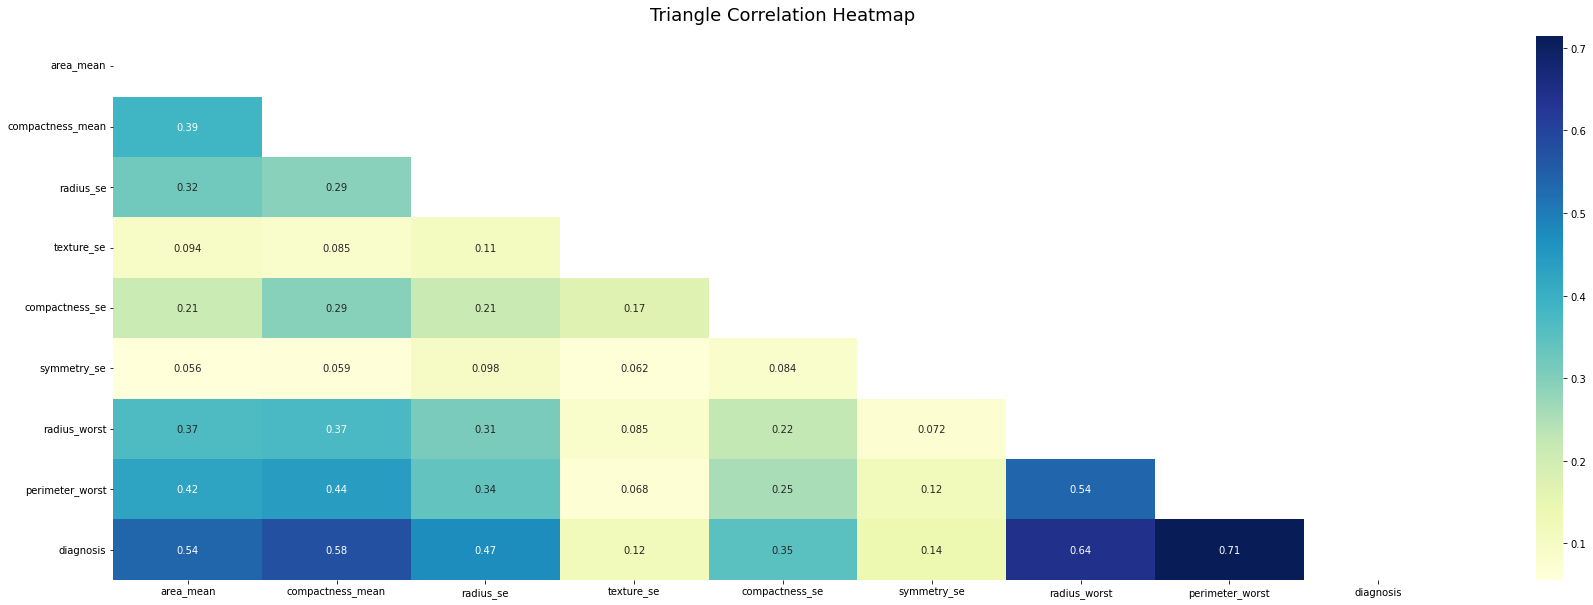

In [19]:
# Corelation Matrix

plt.figure(figsize = (30,10))

mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))
heatmap = sns.heatmap(data.corr(), mask=mask, annot=True, cmap="YlGnBu")

heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

<p>
    Here we have dropped nine less correlated features to the "diagnosis" feature. Second heat map, we can see here that most of the data is highly correlated to the output feature. 
</p>

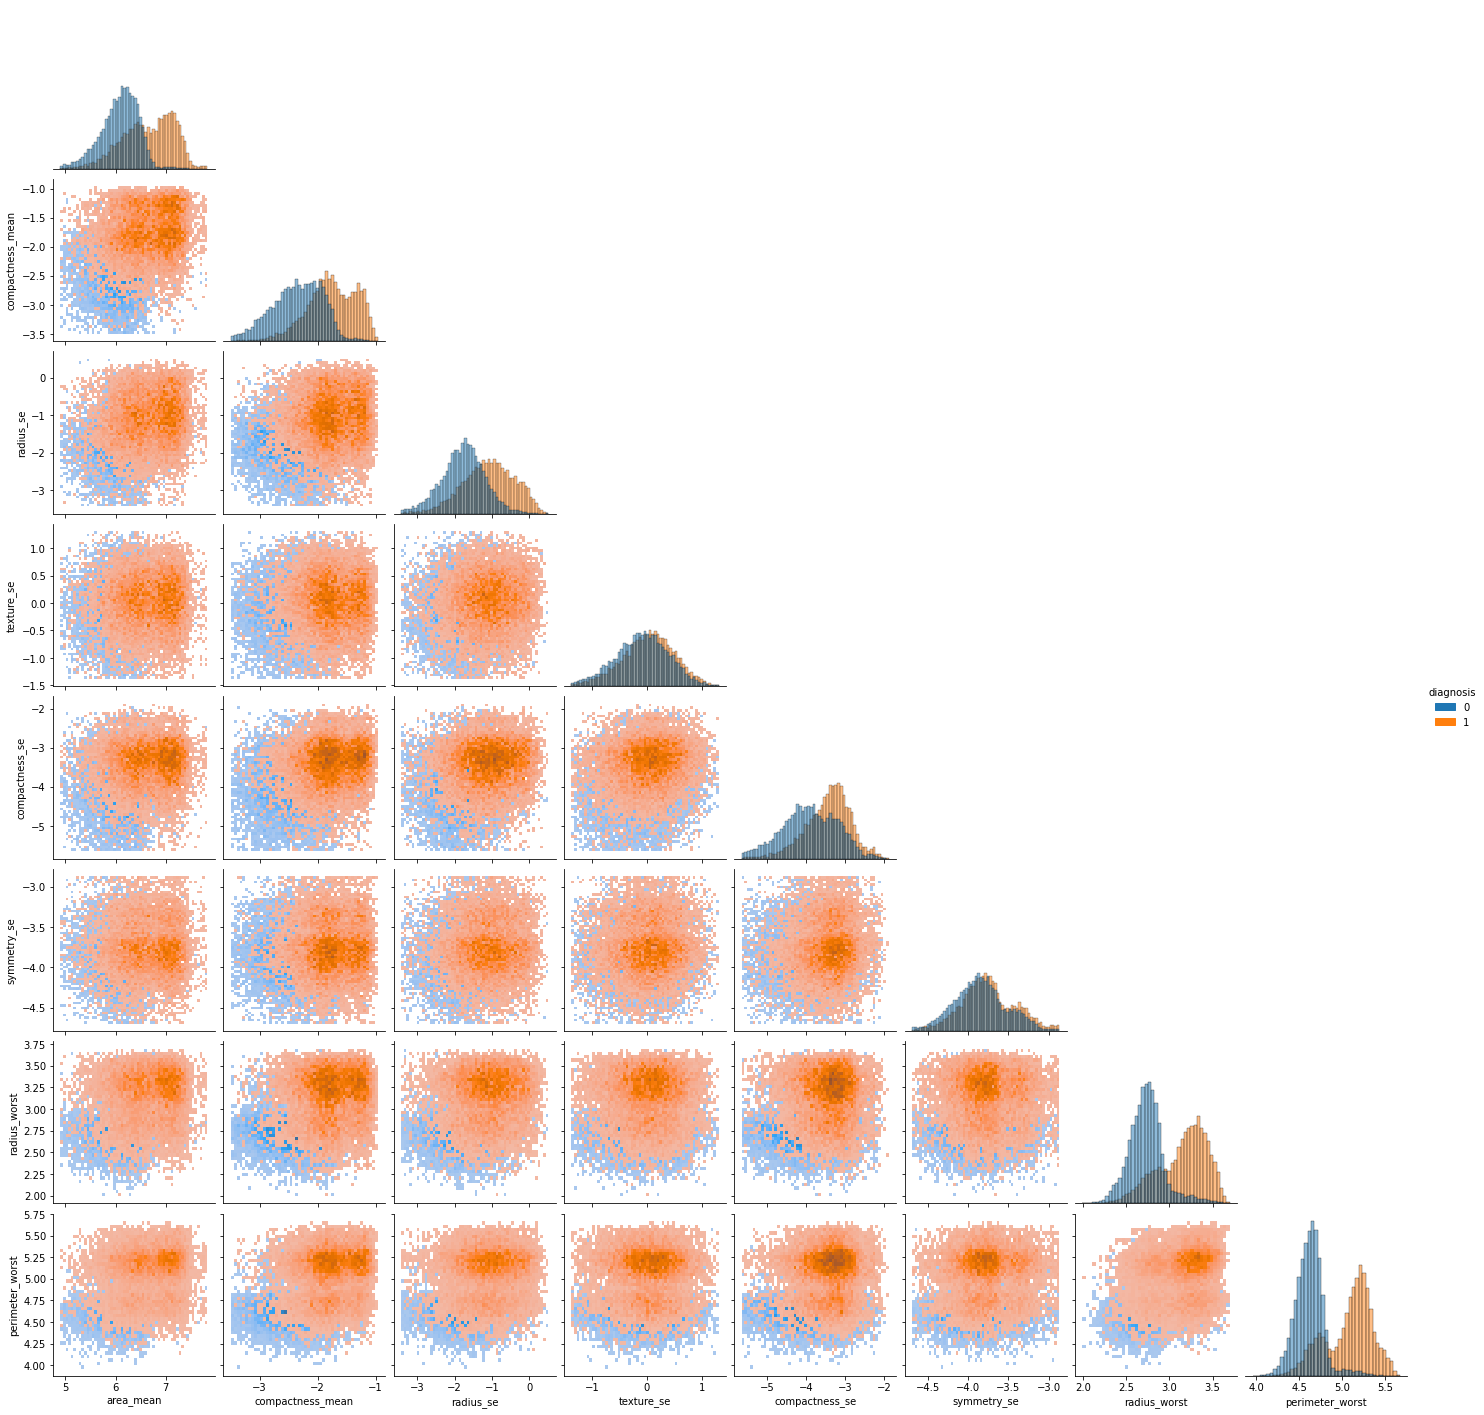

In [20]:
sns.pairplot(data, kind="hist",  hue="diagnosis", corner= True)
plt.show()

<p>
    Now when we plot the histogram pair-plot, we see that most of the data points are overlaping. But we can see that, the selcted features have some data that are separable. 
</p>

<hr>

### Feature Extraction 

<p> 
    Feature Extraction is the process of selection of features by transforming the data points into principle components
</p>

<p>
Principal component analysis (PCA) is the technique of computing the principal components and using them to change the basis of the data, often simply using the first few and disregarding the rest. (A One-Stop Shop for Principal Component Analysis, 2022)
</p>

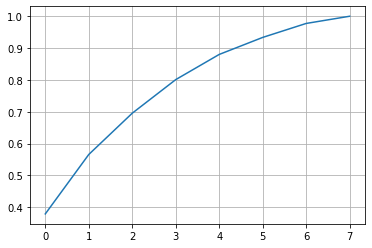

In [21]:
pca = PCA(n_components= None)
pca.fit_transform(data.iloc[:, :-1].values)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid()
plt.show()

In [22]:
# cummuliative sum of varience 

np.cumsum(pca.explained_variance_ratio_)

array([0.37889703, 0.56563392, 0.69535896, 0.8008723 , 0.87999753,
       0.93348329, 0.97737222, 1.        ])

<p>
    The cumulative sum of the variance shows that after the values are not flattening. What this mean is, all the nine features are important towards data modelling. Here we will be selecting the top 5 principle components 
</p>

In [23]:
n = 5

pca = PCA(n_components= n)

most_valued_data_points = pca.fit_transform(data.iloc[:, :-1].values)


DATA = pd.DataFrame(data = most_valued_data_points , columns = [ f"PC-{i}" for i in range(n)] )

DATA['Target'] = data.iloc[:, -1].values

data = DATA.copy()
DATA.head()

,PC-0,PC-1,PC-2,PC-3,PC-4,Target
0,-0.419384,0.672676,-0.680240,-0.772666,-0.120565,0
1,-0.702021,1.151203,-0.125834,-0.434680,0.449051,0
2,-2.030140,0.159265,1.068405,-0.735351,-0.196755,1
3,-0.997782,0.105587,-0.604824,-0.014360,-0.436661,0
4,0.099791,-0.609378,0.544823,0.302234,0.478587,0


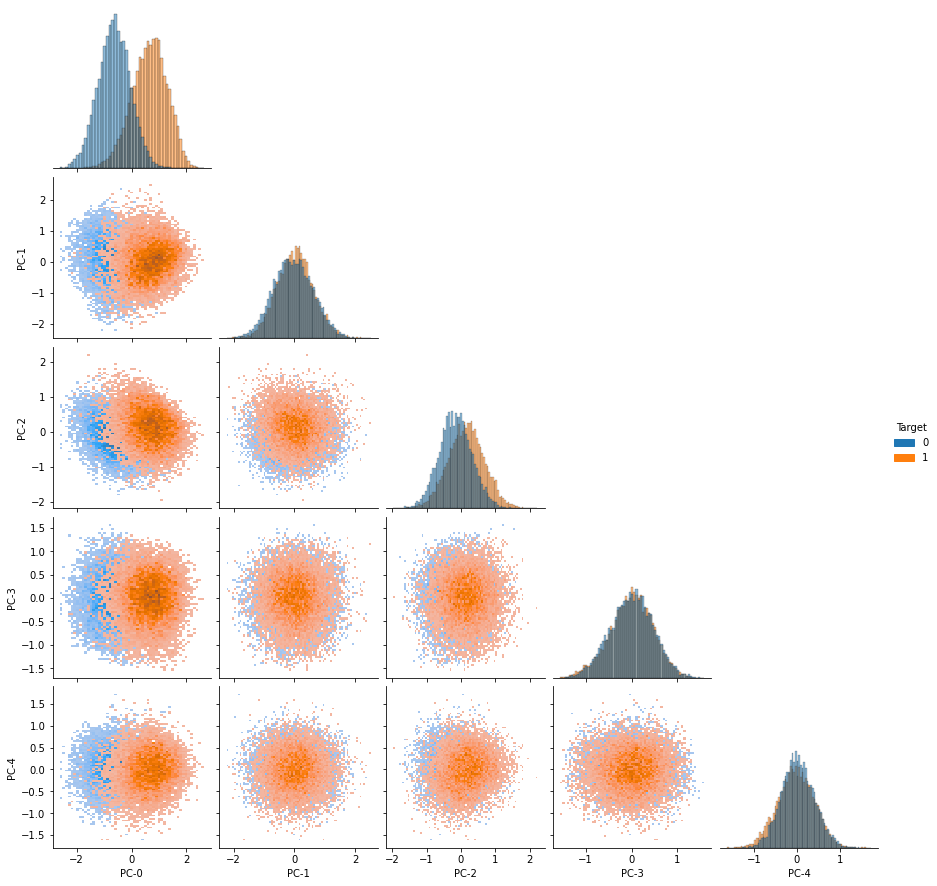

In [24]:
sns.pairplot(data, kind="hist",  hue="Target", corner= True)
plt.show()

### Splitting Data

<p>
    Data splitting, or commonly known as train-test split, is the partitioning of data into subsets for model training and evaluation separately (Data Splitting for Model Evaluation, 2022) . This method will allow us to see if the model is over fitting or not. The test data is the unseen data that has not been used for training. We have selected 80 percent of the data for training and 20 percent of the data for validation
</p>

In [25]:
# split the data 
X_train, X_test, y_train, y_test = train_test_split( data.iloc[:, :-1].values, 
                                                    data.iloc[:, -1].values, 
                                                    test_size=0.20)

# Model Definition and Analysis

### Define helper function 

In [26]:
# Collection of fpr and tpr for various models 
ROC_Values = dict()

def classification_Report(model ,y_pred, model_name):
    """
    input  : object of the model, predicted
    output : returns various metrics to understand model performance 
    """
    
    # sklearns classification report function
    print( classification_report(y_test ,y_pred) )
    
    # Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    hm = sns.heatmap((cf_matrix/np.sum(cf_matrix))*2 , annot=True, fmt='.2%', xticklabels=['benign', 'malignant'], yticklabels=['benign', 'malignant'])
    hm.set_xlabel("Predicted Values", fontsize = 15)
    hm.set_ylabel("Actual Values", fontsize = 15)
    plt.show()
    
    
    # ROC curve 
    fpr, tpr, _  = roc_curve(y_test ,y_pred)
    
    if model_name not in ROC_Values.keys() :
        ROC_Values[model_name] = [fpr, tpr]

In [27]:
def model_Trainer(model_obj, model_name):
    """
    input:
        model_obj  : object of our model 
        model_name : string input 
    returns:
        Generates predictions and classification report
        trained model
    """
    model_obj.fit(X_train, y_train)
    
    y_pred = model_obj.predict(X_test)

    classification_Report(model_obj, y_pred ,model_name)
    
    return model_obj
    

### Machine Learning Approaches

<p>
    In the machine learning approaches, we will use Decission Tree, Randome Forest, SVM classifier and AdaBoost Classifier. To assess the performance we will analise the model using confusion matrix, and the ROC curve. 
</p>

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      2137
           1       0.85      0.87      0.86      2049

    accuracy                           0.86      4186
   macro avg       0.86      0.86      0.86      4186
weighted avg       0.86      0.86      0.86      4186



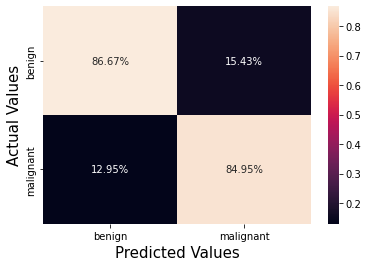

In [28]:
# Create a object of model
Decision_Tree = DecisionTreeClassifier()

# Train the model and generate report
Decision_Tree = model_Trainer(Decision_Tree , "Decision_Tree")

              precision    recall  f1-score   support

           0       0.89      0.92      0.91      2137
           1       0.91      0.89      0.90      2049

    accuracy                           0.90      4186
   macro avg       0.90      0.90      0.90      4186
weighted avg       0.90      0.90      0.90      4186



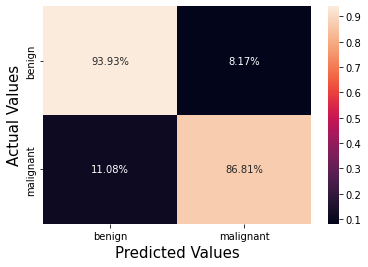

In [29]:
# Create a object of model
Random_Forest = RandomForestClassifier()

# Train the model and generate report
Decision_Tree_Tuned = model_Trainer(Random_Forest, "Random_Forest")

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      2137
           1       0.92      0.88      0.90      2049

    accuracy                           0.90      4186
   macro avg       0.91      0.90      0.90      4186
weighted avg       0.91      0.90      0.90      4186



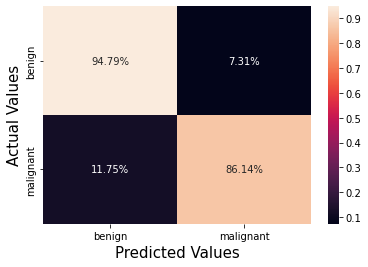

In [30]:
# Create a object of model
svm_classifier = SVC(probability=True)

# Train the model and generate report
svm_classifier = model_Trainer(svm_classifier, "svm_classifier")

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      2137
           1       0.90      0.89      0.90      2049

    accuracy                           0.90      4186
   macro avg       0.90      0.90      0.90      4186
weighted avg       0.90      0.90      0.90      4186



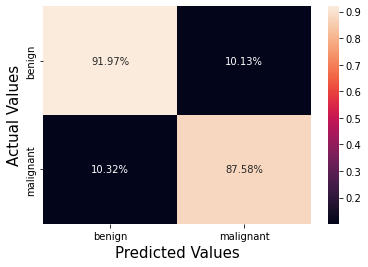

In [31]:
# Create a object of model
AdaBoost_Classifier = AdaBoostClassifier()

# Train the model and generate report
AdaBoost_Classifier = model_Trainer(AdaBoost_Classifier, "AdaBoost_Classifier")

#### Model Comparison

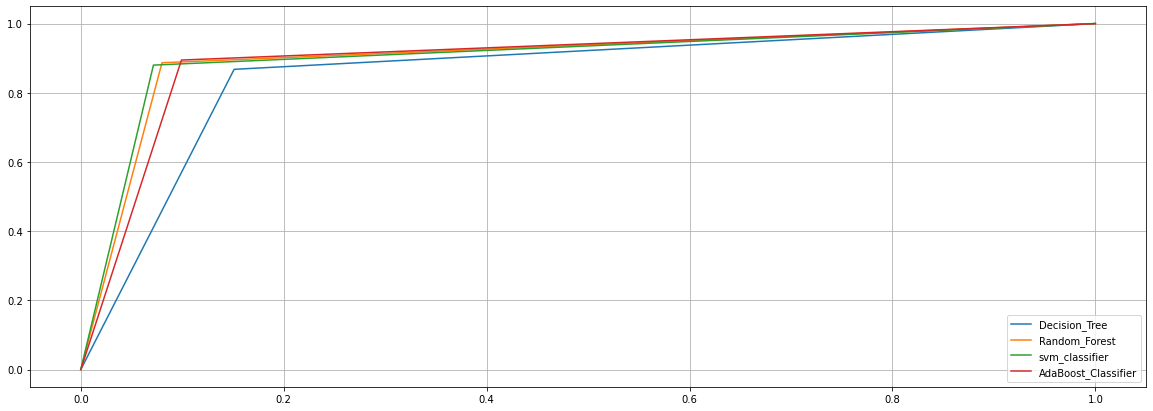

In [32]:
plt.figure(figsize= (20,7))

for i in ROC_Values.keys():
    plt.plot(ROC_Values[i][0], ROC_Values[i][1], label= i)
    plt.legend()

plt.grid()
plt.show()

<b>Conclusion</b> 
<p>
    As we seefrom the analysis of the machine learning model, SVM classifier mas managed to generate better predictions on the test data. To prove this we have 
   <ol>
       <li>Confusion Matrix</li>
       <p> From the c onfusion matrix we see that, SVM classifier is able to classify more number of actual correct prediction than the false values </p>
       <li>ROC curve</li>
       <p> From the ROC curve, the graph that is closes to 1 is considered as the optimum model. Here SVM classifier is working the best and decission tree is least best model to work with </p>
   </ol>
</p>

<hr>

### Deep Learning Approach

<p>
    With a maching learning appoach we have a vey little flexibility while developing of the model. Although this is not the major factor for choosig a deep learning model, but with deep learning we have controle of the parameters like loss function, type of optimizers used, learning rate to name a few. With Deep learning we are able to identify and extract hidden patterns thus understanding relationships between a large number of interdependent variables (Understanding PyTorch with an example: a step-by-step tutorial, 2022)
</p>

In [33]:
# convert the data from the numpy array to tensor

X_train = torch.tensor(X_train).float()
y_train = torch.tensor(y_train).float().reshape(-1,1)

X_test = torch.tensor(X_test).float()
y_test = torch.tensor(y_test).float().reshape(-1,1)

<p>
    Now that we have converted the data into tensors, we will devide the training data into mini batches. With this we can handlethe large data set and also make it quicker for our model to train
</p>

In [34]:
# Convert the splitted data of tensors to TensorDataset
train_data = TensorDataset(X_train, y_train)
test_data = TensorDataset(X_test, y_test)

# From the tensordata set to mini batches 
train_data = DataLoader( train_data, 
                        batch_size= int(X_train.shape[0]/5),  # the data set will be devided into 5 equal mini batches
                       shuffle= True, 
                       drop_last= True)

test_data = DataLoader( test_data, shuffle = True )

<p>
    Here we have define our model. we have one input layer that has 16 neurons, followed by a 3 dense layers. The output layer has one neuron with activation function as Sigmoid. The output layer ranges between 0 and 1.
</p>

In [35]:
# building ann classifier class 

class ANNClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        
        # input layer
        self.input = nn.Linear(X_train.shape[1], 16)
        
        # dense layers 
        self.dense_1 = nn.Linear(16, 32)
        self.dense_1_BN = nn.BatchNorm1d(32)
        
        self.dense_2 = nn.Linear(32, 64)
        self.dense_2_BN = nn.BatchNorm1d(64)
        
        self.dense_3 = nn.Linear(64, 128)
        self.dense_3_BN = nn.BatchNorm1d(128)
        
        # output layer
        self.output = nn.Linear(128,1)
        
    def forward(self,x):
        
        # input layer
        x = F.leaky_relu(self.input(x))
        # dense layer 1 
        x = self.dense_1(x)
        x = F.leaky_relu(self.dense_1_BN(x))
        x = F.dropout(x, p = 0.5 , training= self.training )
        
        
        # dense layer 2
        x = self.dense_2(x)
        x = F.leaky_relu(self.dense_2_BN(x))
        x = F.dropout(x, p = 0.6 , training= self.training )
        
        # dense layer 3 
        x = self.dense_3(x)
        x = F.leaky_relu(self.dense_3_BN(x))
        x = F.dropout(x, p = 0.5 , training= self.training )
    
        # output layer
        x = torch.sigmoid( self.output(x) )
       
        
        return x

<p>
    The Loss function we are using here is Binary Cross Entropy loss, and the optimizer we use are Adam. 
</p>

In [36]:
# create a instance of a class
model = ANNClassifier()

# loss function 
loss_fun = nn.BCELoss()

# optimizer 
optimizer = torch.optim.Adam(model.parameters())  # L2 regularization

<p> 
    Here we have defined a function where we passthe object of the model and the number of epochs. We then have a a for loop that iterates over the number of epochs during the traing process we put our model in traing mode this ensures that the dropout layer is active while traing. During the validation process we put our model in eval mode that dissable the dropout layer
</p>

In [37]:
def model_train_and_validation(model, epoch):
    
    train_acc = []
    test_acc = []
    train_loss = [] #torch.zeros(epoch)
    test_loss =[]
    
    # loop over every epoch
    for epochi in range(epoch):
        
        # loop over traing data batches
        bach_acc = []
        bach_loss = []
        for x,y in train_data: 
            
            # forward propogation
            yHat = model(x) 
            
            # loss 
            loss = loss_fun(yHat, y)
            bach_loss.append(loss.detach().numpy())
            
            
            # back propogation 
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            
            # compute batch accuracy 
            bach_acc.append( torch.mean(((model(x)>.5) == y).float()) )
            
            
        # compute training accuracy and loss
        train_acc.append(np.mean(bach_acc))
        train_loss.append( np.mean(bach_loss) )
        
        # evaluation mode on
        model.eval()
        
        
        yHat = (model(X_test)>.5).float()
        test_acc.append( accuracy_score( y_test, yHat ) ) 
        test_loss.append( loss_fun(model(X_test), y_test).detach().numpy() )
        
        # model back to train mode
        model.train()
        
        print(f" Epoch : {epochi}, Train Acc : {train_acc[epochi]}, Train Loss : {train_loss[epochi]},  ")
        
    model.eval()  
    return train_acc, train_loss, test_acc, test_loss

In [38]:
train_acc, train_loss, test_acc, test_loss = model_train_and_validation(model, 30)

 Epoch : 0, Train Acc : 0.582377552986145, Train Loss : 0.6926530599594116,  
 Epoch : 1, Train Acc : 0.6980286836624146, Train Loss : 0.6001327633857727,  
 Epoch : 2, Train Acc : 0.7719235420227051, Train Loss : 0.5220789313316345,  
 Epoch : 3, Train Acc : 0.8143369555473328, Train Loss : 0.4639011323451996,  
 Epoch : 4, Train Acc : 0.8350059390068054, Train Loss : 0.4136274456977844,  
 Epoch : 5, Train Acc : 0.8505973815917969, Train Loss : 0.3821902871131897,  
 Epoch : 6, Train Acc : 0.8651732206344604, Train Loss : 0.34835898876190186,  
 Epoch : 7, Train Acc : 0.8692951202392578, Train Loss : 0.3321214020252228,  
 Epoch : 8, Train Acc : 0.8756869435310364, Train Loss : 0.3240959048271179,  
 Epoch : 9, Train Acc : 0.8816009759902954, Train Loss : 0.30760717391967773,  
 Epoch : 10, Train Acc : 0.8829749226570129, Train Loss : 0.3047292232513428,  
 Epoch : 11, Train Acc : 0.8869174718856812, Train Loss : 0.2995419502258301,  
 Epoch : 12, Train Acc : 0.8872759938240051, Trai

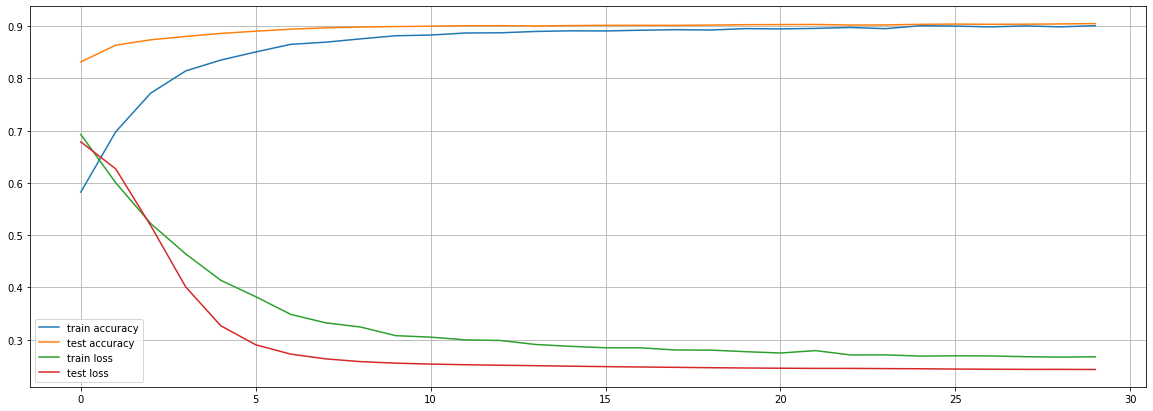

In [39]:
plt.figure(figsize= (20,7))

plt.plot(train_acc, label = "train accuracy")
plt.plot(test_acc, label = "test accuracy")
plt.plot( train_loss, label = "train loss" )
plt.plot( test_loss, label = "test loss" )
plt.legend()
plt.grid()
plt.show()

<p>
    From the above results we see that model is not underfitting as the traing accuracy is increasing for every iteration. Model doesnot over fit as well as the difference between the traing accuracy and the test accuracy is minimal
</p>

In [40]:
print(f" The traing accuracy is { accuracy_score( y_train, (model(X_train)>.5).float() ) }")
print(f" The test   accuracy is { accuracy_score( y_test, (model(X_test)>.5).float() ) } ")

 The traing accuracy is 0.904599761051374
 The test   accuracy is 0.904921165790731 


# Generate Predictions 

<p>
    The Testing data has to be of the dame format as the tring data. We here, have implemented all the data transformation that were used on the traing set 
</p>

In [41]:
# Load the test data points 

df = pd.read_csv("Dataset/test_100r.csv")
Id = df.iloc[:, 0].values.astype(np.int32)
df.drop( labels= ['id'], axis= 1, inplace= True )
df.drop( labels= feature_to_drop , axis= 1, inplace= True )
df = df.dropna()
df.head()


,area_mean,compactness_mean,radius_se,texture_se,compactness_se,symmetry_se,radius_worst,perimeter_worst
0,195.624827,0.133505,0.318265,0.503511,0.015040,0.009875,12.483659,85.471488
1,450.381515,0.045394,0.051749,0.486811,0.010272,0.024627,17.676051,100.798972
2,1316.008018,0.345116,0.252043,1.426859,0.040981,0.021824,13.035890,108.220078
3,1042.768588,0.093098,0.539824,1.817885,0.038642,0.017241,16.751836,91.684245
4,1117.781440,0.203851,0.137775,1.642414,0.043478,0.024664,16.795885,114.458955


In [42]:
# Data Normalisation 
df_fea = df.columns
df[df_fea] = df[df_fea].apply(np.log)

# dimentianality reduction 
most_valued_data_points = pca.transform(df.iloc[:, :].values)
DATA = pd.DataFrame(data = most_valued_data_points , columns = [ f"PC-{i}" for i in range(n)] )
df = DATA.copy()

df.head()

,PC-0,PC-1,PC-2,PC-3,PC-4
0,-0.746878,0.559210,-0.626820,-0.692159,-0.750444
1,-2.026339,-0.101832,0.353943,-0.340173,0.569696
2,0.865603,-0.379263,0.660407,0.320246,-0.124416
3,0.790982,0.147263,-0.504407,0.530714,0.617806
4,0.348905,-0.788771,0.595761,0.500210,0.144094


In [43]:
# Store the results in the dataFrame
res = pd.DataFrame()
res['id'] = Id

res['diagnosis'] = pd.DataFrame(   model(torch.tensor(df.values).float()).detach().numpy()  )
res = res.dropna()
# Save the csv file with name as "results" and file extention ".csv"
res.to_csv( 'neural_network_1.csv' , index = False)

# References

<ol>
    <li> Pandas.pydata.org. 2022. pandas.DataFrame — pandas 1.4.2 documentation. [online] Available at: <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html"> link </a>[Accessed 7 April 2022]. </li>
    <li> Medium. 2022. Data Splitting for Model Evaluation. [online] Available at:  <a href="https://towardsdatascience.com/data-splitting-for-model-evaluation-d9545cd04a99"> link </a>[Accessed 6 April 2022]. </li>
    <li> Medium. 2022. Outlier detection 101: Median and Interquartile range.. [online] Available at: <a href = "https://medium.com/@davidnh8/outlier-detection-101-median-and-interquartile-range-cc9dde94c0ac"> link </a> [Accessed 2 April 2022]. </li>
    <li> Medium. 2022. Understanding PyTorch with an example: a step-by-step tutorial. [online] Available at: <a href = "https://towardsdatascience.com/understanding-pytorch-with-an-example-a-step-by-step-tutorial-81fc5f8c4e8e"> link </a> [Accessed 2 April 2022]. </li>
    <li> Medium. 2022. A One-Stop Shop for Principal Component Analysis. [online] Available at: <a href = "https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c"> link </a> [Accessed 5 April 2022]. </li>
    <li> Medium. 2022. Data Preprocessing. [online] Available at: <a href = "https://medium.com/@yogeshojha/data-preprocessing-75485c7188c4">link </a> [Accessed 5 April 2022]. </li>
    <li> Pytorch.org. 2022. PyTorch documentation — PyTorch 1.11.0 documentation. [online] Available at: <a href = "https://pytorch.org/docs/stable/index.html"> link </a> [Accessed 13 March 2022]. </li>
    <li> Scikit-learn.org. 2022. scikit-learn: machine learning in Python — scikit-learn 1.0.2 documentation. [online] Available at: <a href = "https://scikit-learn.org/stable/"> link </a> [Accessed 20 March 2022]. </li>
</ol>